In [1]:
# Algunas bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn
from scipy.spatial.distance import cdist 

Repaso K-Medias

El algoritmo k-medias sirve para encontrar un número previamente determinado de grupos a partir de un espacio con multiples dimensiones (es decir múltiples variables)

Suposiciones base del modelo de *k*-medias:

- El "centro del conglomerado" es la media aritmética de todos los puntos pertenecientes al conglomerado.
- Cada punto está más cerca de su propio centro de clúster que de otros centros de clúster.

Para los primeros ejercicios vamos a crear 4 grupos de datos en 2 dimensiones.

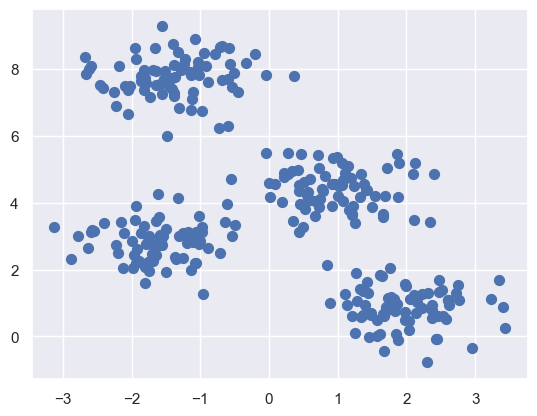

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

A pesar de que es un problema fácil de resolver a simple vista. Buscamos que esto lo haga automáticamente un algorítmo, en este caso k-medias. Usemos sklearn para resolver el problema

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[1 0 2 0 1 1 3 2 0 0 3 0 2 0 1 2 2 1 3 3 1 1 2 3 3 2 1 2 3 2 0 0 2 0 0 0 0
 0 3 1 2 3 2 2 3 3 0 3 0 1 3 1 0 1 1 3 0 3 0 1 0 2 0 3 3 3 0 1 0 3 2 3 0 3
 3 0 3 2 1 0 1 2 1 1 0 2 1 2 0 0 2 1 0 3 3 2 1 1 2 3 0 1 0 1 2 1 1 2 0 2 3
 3 1 0 1 2 0 1 1 2 3 1 3 1 1 1 1 3 1 3 0 3 3 1 0 3 3 0 2 0 0 3 2 3 2 3 0 2
 0 0 0 2 0 2 1 3 0 3 1 2 0 2 2 1 2 3 3 2 1 2 2 0 1 2 3 0 1 1 2 3 1 2 3 3 2
 2 2 2 1 0 2 3 2 2 3 3 3 2 3 0 2 3 1 3 2 0 3 0 2 0 2 3 2 2 0 3 3 1 1 2 0 1
 1 3 1 3 2 0 0 2 2 0 2 1 3 2 1 3 0 3 1 2 1 0 0 0 0 3 3 0 2 3 1 2 3 3 3 1 1
 0 2 2 3 1 0 3 2 0 2 1 1 3 3 2 1 1 1 2 0 0 1 1 2 1 1 1 0 3 0 2 1 1 0 0 0 1
 1 2 0 3]


Sklearn nos devuelve una lista de la etiqueta del grupo al que pertenece. 

Vamos a ver los resultados coloreando los datos con esas etiquetas.

Sklearn también nos devuelve los centroides. Grafiquémoslos igualmente

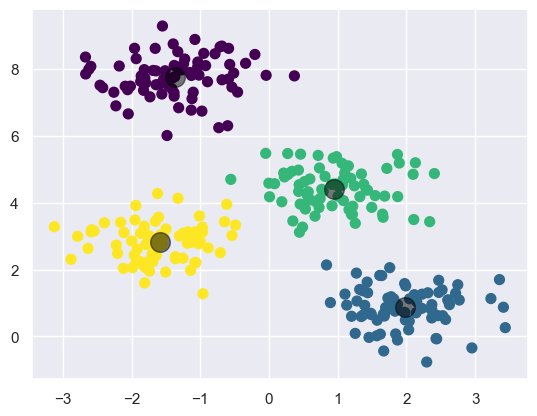

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Para encontrar los grupos, sklearn utiliza un algoritmo llamado Expectation maximization (E-M), este algorítmo es ampliamente utilizado en ciencia de datos pero k-medias es un caso particular muy fácil de entender. El procedimiento es el siguiente:
  1. Inventa aleatoriamente los centroides
  2. Repite los siguientes pasos hasta hallar la convergencia:
    - Paso-E: Asigna cada uno de los ejemplos al centroide mas cercano formando un grupo para cada centroide
    - Paso-M: Re calcula los centroides como el promedio de los puntos asignados a su grupo

In [5]:
A continuación podemos ver un diagrama del algorítmo:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)

SyntaxError: invalid syntax (2555094574.py, line 1)

Reto 1

Anteriormente usamos la bilbioteca sklearn para hacer los clusters de la variable X pero para este reto no utilizaremos ninguna implementación previa de *k*-means.

Escribe tu propio código para crear una función "***mi_algoritmo_kmeans***" que tenga los siguientes parámetros:
  - **X**: variable multidimensional
  - **n_clusters**: número de clusters a crear
  - **semilla**: semilla que servirá para replicar la inicialización aleatoria

La función debe devolver los siguientes datos:
  - **centroides**: un arreglo con las coordenadas de los centroides
  - **etiquetas**: un arreglo con las etiquetas de los grupos (clusters)

Sugerencia:

Puedes apoyarte (pero no es necesario) de las siguientes funciones:
  - from sklearn.metrics import pairwise_distances_argmin
  - np.random.RandomState(semilla)
  - np.random.RandomState(semilla).permutation(*parametros*)

In [28]:
def mi_algoritmo_kmeans(x,k, seed = 2):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroides = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroides) #Step 2
     
    #Centroid with the minimum Distance
    etiquetas = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(10000): 
        centroides = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[etiquetas==idx].mean(axis=0) 
            centroides.append(temp_cent)
 
        centroides = np.vstack(centroides) #Updated Centroids 
         
        distances = cdist(x, centroides)
        etiquetas = np.array([np.argmin(i) for i in distances])
         
    return centroides, etiquetas 

In [29]:
# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X, 4, seed = 2)
centroides, etiquetas


(array([[-1.58438467,  2.83081263],
        [ 0.94973532,  4.41906906],
        [-1.37324398,  7.75368871],
        [ 1.98258281,  0.86771314]]),
 array([3, 2, 1, 2, 3, 3, 0, 1, 2, 2, 0, 2, 1, 2, 3, 1, 1, 3, 0, 0, 3, 3,
        1, 0, 0, 1, 3, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 3, 1, 0, 1, 1,
        0, 0, 2, 0, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 2, 3, 2, 1, 2, 0, 0, 0,
        2, 3, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 3, 1,
        2, 2, 1, 3, 2, 0, 0, 1, 3, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 1, 2, 1,
        0, 0, 3, 2, 3, 1, 2, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 0,
        0, 3, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1,
        3, 0, 2, 0, 3, 1, 2, 1, 1, 3, 1, 0, 0, 1, 3, 1, 1, 2, 3, 1, 0, 2,
        3, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 2, 1, 0, 3, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 3, 3, 1,
        2, 3, 3, 0, 3, 0, 1, 2, 2, 1, 1, 2, 1, 3, 0, 1, 3, 0, 2, 0, 3, 1,
        3, 2, 2, 2, 2, 0, 0, 2, 1, 0, 3,

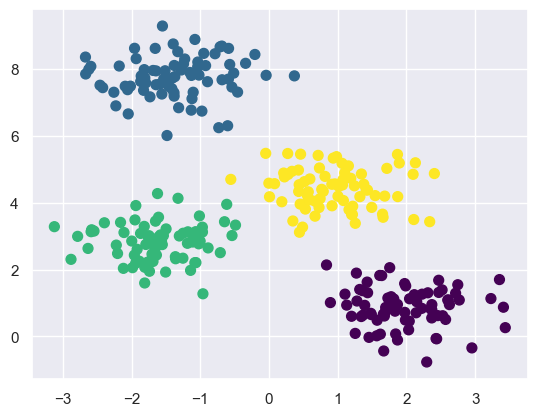

In [27]:
# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas,
            s=50, cmap='viridis');

****RETO 2****

Repite el ejercicio anterior (utilizando tu función) pero esta vez indica al algorímto que cree 3 clusters en vez de 4. Comparte tus conclusiones.

In [30]:
centroides, etiquetas = mi_algoritmo_kmeans(X, 3, seed = 2)
centroides, etiquetas


(array([[-1.37324398,  7.75368871],
        [ 1.98726097,  0.90144281],
        [-0.33514647,  3.62624134]]),
 array([1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2,
        2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2,
        0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
        0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
        2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
        2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2,
        1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0,
        1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2,
        0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2,
        1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1,
  

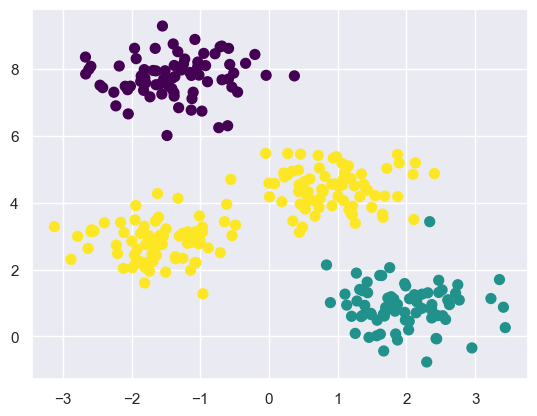

In [31]:
# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas,
            s=50, cmap='viridis');

***RETO 3***

La variable X que creamos tiene 2 dimensiones

In [32]:
X.shape

(300, 2)

Vamos a tomar una de estas dimensiones y multiplicarla por el escalar e=100 y visualicemos nuestro nuevo dataset X_reescala

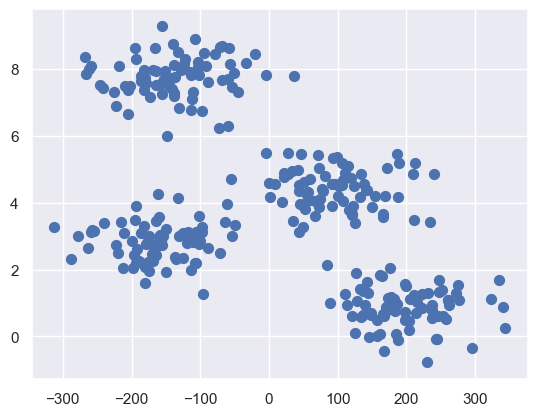

In [33]:
e = 100
X_reescala = np.stack((e*X[:, 0], X[:, 1]), axis=1)
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], s=50);

La gráfica luce idéntica. Sin embargo nota como el eje $horizontal$ tiene valores 10 veces mas grandes

Ahora aplica el alogrítmo de k-medias para crear 4 grupos pero esta vez sobre las variables $X$_$reescala$ y escribe tus conclusiones sobre los resultados

In [34]:
# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X_reescala, 4, seed = 2)
centroides, etiquetas

(array([[-194.6488249 ,    4.90724405],
        [ 215.17045648,    1.48875057],
        [  88.95827227,    3.6698357 ],
        [ -95.86398819,    5.67422814]]),
 array([2, 3, 2, 3, 2, 1, 0, 2, 3, 3, 0, 0, 2, 0, 2, 2, 2, 1, 3, 3, 1, 1,
        2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 2, 0, 3, 1,
        0, 3, 3, 0, 0, 1, 0, 1, 3, 1, 1, 3, 3, 3, 0, 2, 0, 2, 0, 3, 0, 3,
        0, 1, 0, 0, 2, 3, 3, 0, 0, 3, 0, 2, 1, 3, 2, 2, 2, 1, 3, 2, 1, 2,
        0, 0, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 3, 1, 3, 1, 2, 1, 1, 2, 3, 2,
        3, 0, 1, 0, 1, 1, 0, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3, 2, 0, 3, 0,
        0, 1, 3, 3, 0, 0, 2, 3, 0, 3, 2, 0, 1, 0, 3, 2, 3, 0, 0, 2, 3, 2,
        1, 3, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 3, 2, 2, 2, 2, 3, 2, 1, 3, 3,
        1, 1, 2, 3, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 0, 3, 0, 1,
        0, 0, 2, 3, 1, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 3, 3, 3, 1, 1, 2,
        0, 1, 1, 0, 1, 0, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 1, 2,
        1, 0, 0, 0, 0, 0

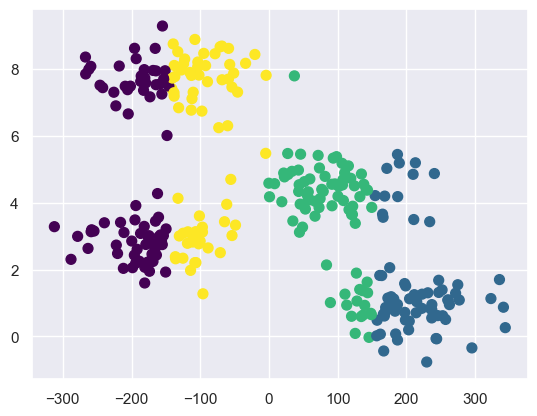

In [35]:
# Veamos los resultados
plt.scatter(X_reescala[:, 0], X[:, 1], c=etiquetas,
            s=50, cmap='viridis');

Podemos observar que el algoritmo dividió muy marcadamente los cluster de forma horizontal, y no alrededor de las nubes de puntos. Esto es así porque si ponemos la gráfica aescala real, difícilmente su podrían apreciar las nubes de puntos. Es interesante observar esto, ya que intuitivamente pensaríamos que el alforitmo está mál, pero no es así. Si en un trabajo que llegaramos a estar, vemos un cluster así, ya sabremos que tendríamos que reescalar las variables.